In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [3]:
colors = {
    "red":(0,0),
    "green":(0,1),
    "orange":(1,0),
    "yellow":(1,1)
    }

code_len = 4

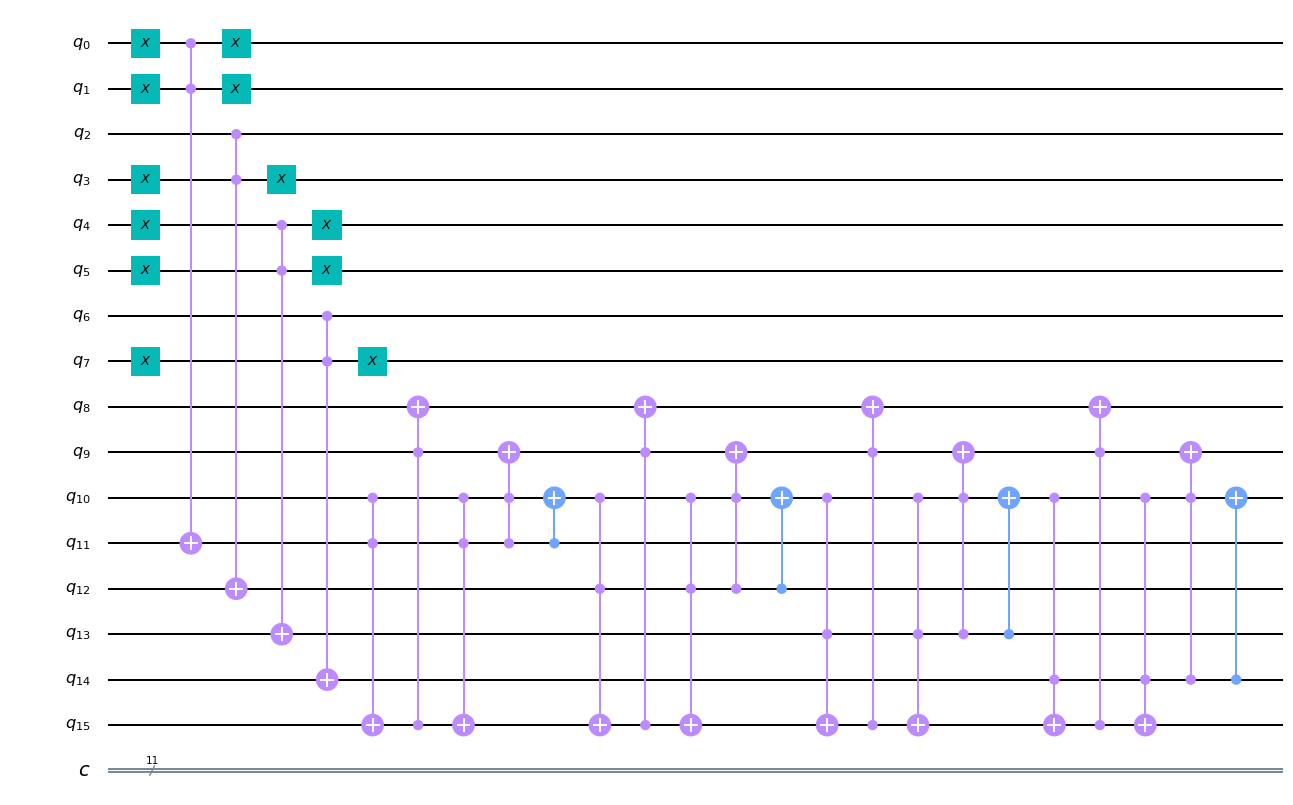

In [8]:
n_qubits = 16 # in the video we watched 11 but we are going to need 5 auxiliar qubits (the last)
              #                                       (we can do it with only 2 auxiliar qubits)
code = ["red", "orange", "red", "orange"]
game_operator = QuantumCircuit(n_qubits, n_qubits - 5)

for i, color in enumerate(code):
    for j,k in enumerate(colors[color]):
        if k == 0:
            game_operator.x(2*i+j)
            
    game_operator.ccx(2*i, 2*i + 1, 11 + i)
    
    for j,k in enumerate(colors[color]):
        if k == 0:
            game_operator.x(2*i+j)
    

for i in range(11,15):
    game_operator.ccx(i, 10, 15)
    game_operator.ccx(15,9, 8)
    game_operator.ccx(i, 10, 15)
    game_operator.ccx(i, 10, 9)
    game_operator.cx(i, 10)
    
# I repeat this part to clean the ancillas (if you don't use the gate more than one time
# in the circuit,it is not necessary)
"""
for i, color in enumerate(code):
    for j,k in enumerate(colors[color]):
        if k == 0:
            game_operator.x(2*i+j)
            
    game_operator.ccx(2*i, 2*i + 1, 11 + i)
    
    for j,k in enumerate(colors[color]):
        if k == 0:
            game_operator.x(2*i+j)
"""          

game_operator.draw(output = 'mpl')

            



In [9]:
quest = ["orange", "orange", "red", "orange"]
quest_operator = QuantumCircuit(n_qubits, n_qubits - 5)


for i, color in enumerate(quest):
    for j,k in enumerate(colors[color]):
        if k == 1:
            quest_operator.x(2*i+j)


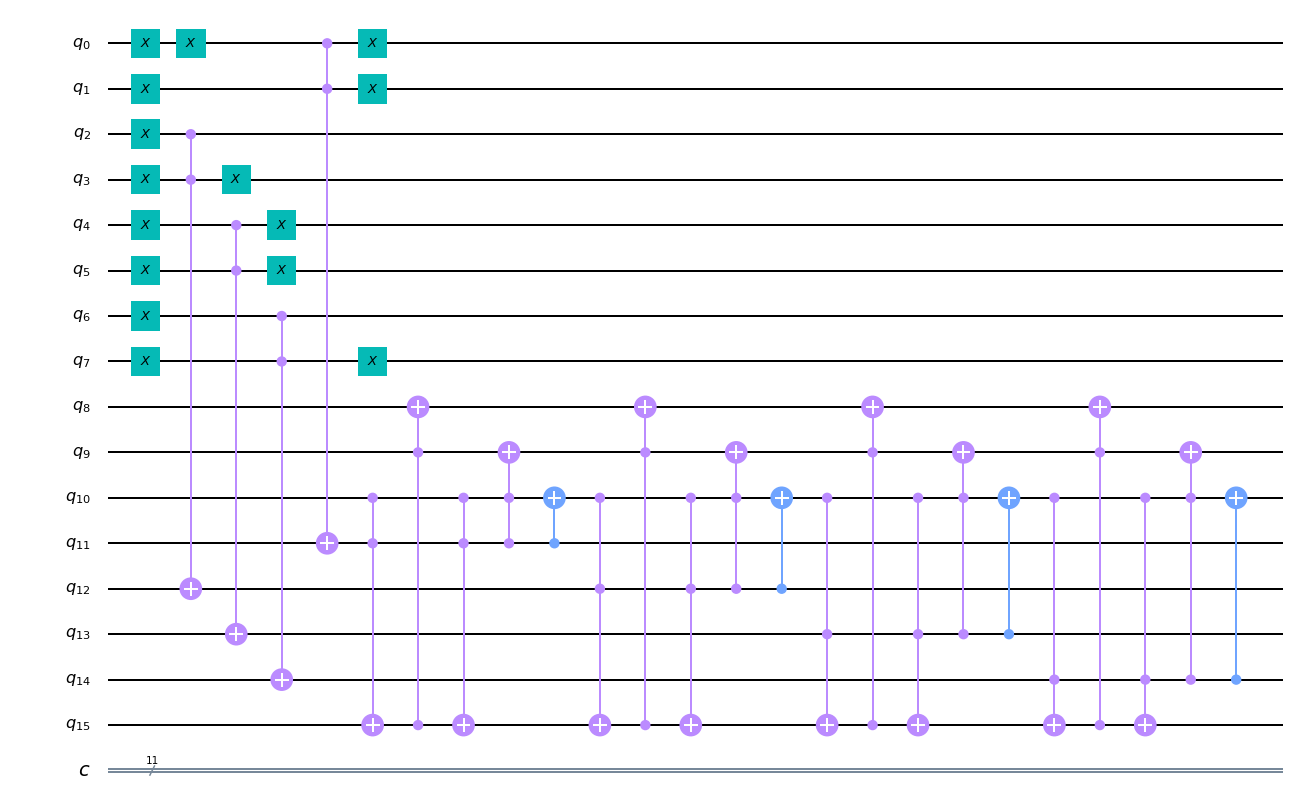

In [10]:
circ = quest_operator + game_operator
circ.draw(output = 'mpl')

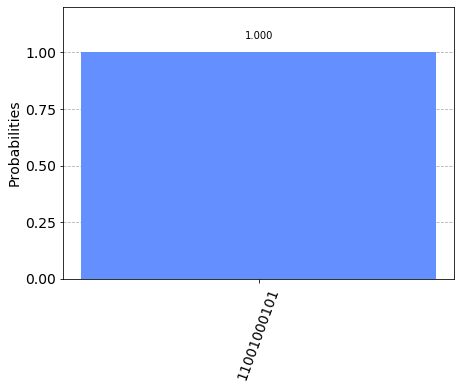

In [11]:
circ.measure(range(11), range(11))
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)